In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 385.0/385.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 241.6/24

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

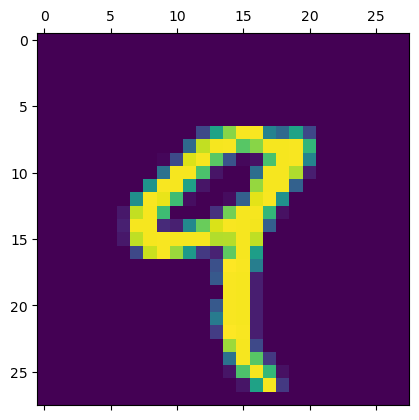

In [18]:
plt.matshow(X_train[4])

In [19]:
y_train[4]

9

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
#Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

C:\Users\kunji\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8764 - loss: 0.4426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9610 - loss: 0.1324
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9731 - loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9860 - loss: 0.0488


In [15]:
model.get_weights()

[array([[ 0.05107024,  0.01201724, -0.01683696, ..., -0.07984494,
         -0.06152118, -0.08081858],
        [ 0.02475215,  0.07561599,  0.03063396, ..., -0.07998926,
          0.04525466, -0.00983761],
        [-0.01154416,  0.03255294, -0.04586845, ...,  0.06993587,
          0.05291125,  0.07418038],
        ...,
        [ 0.00717348,  0.05842187,  0.03976645, ...,  0.08128949,
          0.05045973,  0.03048157],
        [-0.03800859, -0.05306984,  0.0336346 , ..., -0.04063697,
         -0.02415023,  0.07665664],
        [ 0.07174869, -0.06705654, -0.05041384, ..., -0.0631579 ,
          0.02244174,  0.05201967]], dtype=float32),
 array([ 0.0217262 , -0.03998265, -0.1000557 ,  0.10240953, -0.03413063,
         0.0055094 ,  0.08810436,  0.17607082, -0.01337606,  0.07780682,
         0.05489642, -0.01478278,  0.01440584,  0.16347845,  0.13626204,
         0.06262866,  0.03550436,  0.0033027 , -0.03027938, -0.01333435,
         0.06690151,  0.06595068, -0.10584855,  0.06477451, -0.026